In [1]:
import pandas as pd

In [2]:
folder_20 = pd.read_csv('/kaggle/input/fire-flacon/20/2021-05-15_weather.csv')
folder_20

,time,Тсред,Тмин,Тмакс,Осадки всего,Направление ветра,Скорость ветра,Порывы ветра,Давление на уровне моря
0,2021-02-16,-10.6,-14.1,-5.8,1.0,289.0,6.3,NaN,1017.2
1,2021-02-17,-16.6,-19.5,-11.5,0.1,267.0,13.3,NaN,1024.6
2,2021-02-18,-18.7,-22.1,-15.4,7.2,86.0,10.9,NaN,1022.7
3,2021-02-19,-18.5,-21.0,-17.2,3.9,335.0,17.2,NaN,1011.3
4,2021-02-20,-22.1,-26.6,-17.8,0.0,203.0,9.4,NaN,1025.4
...,...,...,...,...,...,...,...,...,...
57,2021-04-14,5.8,1.1,11.7,0.0,246.0,13.8,NaN,1031.9
58,2021-04-15,6.9,1.9,13.8,0.0,252.0,9.7,NaN,1024.3
59,2021-04-16,7.6,0.2,12.4,0.0,318.0,18.1,NaN,1018.5
60,2021-04-17,2.1,-4.6,8.5,0.0,294.0,9.9,NaN,1024.4


In [3]:
folder_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   time                     62 non-null     object 
 1   Тсред                    62 non-null     float64
 2   Тмин                     62 non-null     float64
 3   Тмакс                    62 non-null     float64
 4   Осадки всего             62 non-null     float64
 5   Направление ветра        62 non-null     float64
 6   Скорость ветра           62 non-null     float64
 7   Порывы ветра             0 non-null      float64
 8   Давление на уровне моря  62 non-null     float64
dtypes: float64(8), object(1)
memory usage: 4.5+ KB


In [4]:
folder_0 = pd.read_csv('/kaggle/input/fire-flacon/00/2021-06-06_weather.csv')
folder_1 = pd.read_csv('/kaggle/input/fire-flacon/01/2021-05-26_weather.csv')
folder_2 = pd.read_csv('/kaggle/input/fire-flacon/02/2021-06-03_weather.csv')
folder_3 = pd.read_csv('/kaggle/input/fire-flacon/03/2021-06-03_weather.csv')
folder_4 = pd.read_csv('/kaggle/input/fire-flacon/04/2021-06-06_weather.csv')
folder_5 = pd.read_csv('/kaggle/input/fire-flacon/05/2021-06-03_weather.csv')
folder_6 = pd.read_csv('/kaggle/input/fire-flacon/06/2021-06-03_weather.csv')
folder_7 = pd.read_csv('/kaggle/input/fire-flacon/07/2021-06-03_weather.csv')
folder_8 = pd.read_csv('/kaggle/input/fire-flacon/08/2021-06-08_weather.csv')
folder_9 = pd.read_csv('/kaggle/input/fire-flacon/09/2021-06-16_weather.csv')
folder_10 = pd.read_csv('/kaggle/input/fire-flacon/10/2021-06-16_weather.csv')
folder_11 = pd.read_csv('/kaggle/input/fire-flacon/11/2018-06-01_weather.csv')
folder_12 = pd.read_csv('/kaggle/input/fire-flacon/12/2019-05-10_weather.csv')
folder_13 = pd.read_csv('/kaggle/input/fire-flacon/13/2019-05-17_weather.csv')
folder_14 = pd.read_csv('/kaggle/input/fire-flacon/14/2019-05-28_weather.csv')
folder_15 = pd.read_csv('/kaggle/input/fire-flacon/15/2020-04-22_weather.csv')
folder_16 = pd.read_csv('/kaggle/input/fire-flacon/16/2020-05-09_weather.csv')
folder_17 = pd.read_csv('/kaggle/input/fire-flacon/17/2020-05-26_weather.csv')
folder_18 = pd.read_csv('/kaggle/input/fire-flacon/18/2021-05-02_weather.csv')
folder_19 = pd.read_csv('/kaggle/input/fire-flacon/19/2021-05-04_weather.csv')

In [5]:
folders = [folder_0, folder_1, folder_2, folder_3, folder_4, folder_5, 
          folder_6, folder_7, folder_8, folder_9, folder_10, folder_11,
          folder_12, folder_13, folder_14, folder_15, folder_16, folder_17,
          folder_18, folder_19, folder_20]

In [8]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np

In [10]:
import rasterio
from rasterio.enums import Resampling
import numpy as np
import os
import glob
import tifffile as tiff

# Путь к директории с изображениями
input_dir = '/kaggle/input/fire-flacon'
output_dir = 'augmented_images'
os.makedirs(output_dir, exist_ok=True)

# Функция для осветления изображения
def brighten_image(image):
    return np.clip(image * 5, 0, 255).astype(np.uint8)

# Функция для сохранения изображения в формате .tiff с использованием rasterio
def save_image_tiff(img, filename):
    with rasterio.open(
        os.path.join(output_dir, filename),
        'w',
        driver='GTiff',
        height=img.shape[0],
        width=img.shape[1],
        count=img.shape[2],
        dtype=img.dtype
    ) as dst:
        for i in range(img.shape[2]):
            dst.write(img[:, :, i], i + 1)

# Функция для аугментации и сохранения изображений
def augment_and_save(image, base_name):
    brightened_image = brighten_image(image)
    
    # Сохранение оригинального изображения
    save_image_tiff(brightened_image, f'{base_name}_original.tiff')

    # Поворот на 90 градусов
    rotated_90 = np.rot90(brightened_image)
    save_image_tiff(rotated_90, f'{base_name}_rotated_90.tiff')

    # Поворот на 180 градусов
    rotated_180 = np.rot90(brightened_image, 2)
    save_image_tiff(rotated_180, f'{base_name}_rotated_180.tiff')

    # Поворот на 270 градусов
    rotated_270 = np.rot90(brightened_image, 3)
    save_image_tiff(rotated_270, f'{base_name}_rotated_270.tiff')

    # Зеркальный поворот по вертикали
    flipped_vertical = np.flipud(brightened_image)
    save_image_tiff(flipped_vertical, f'{base_name}_flipped_vertical.tiff')

    # Зеркальный поворот по горизонтали
    flipped_horizontal = np.fliplr(brightened_image)
    save_image_tiff(flipped_horizontal, f'{base_name}_flipped_horizontal.tiff')

# Поиск всех изображений в директории
image_files = glob.glob(os.path.join(input_dir, '**/*.tiff'), recursive=True)

# Фильтрация изображений, исключая те, которые содержат '_weather' в названии
image_files = [f for f in image_files if '_weather' not in f]

# Обработка каждого изображения
for idx, image_path in enumerate(image_files):
    image = tiff.imread(image_path)
    
    base_name = f'photo_{idx}'
    augment_and_save(image, base_name)

print(f'Изображения сохранены в директорию: {output_dir}')

/opt/conda/lib/python3.10/site-packages/rasterio/__init__.py:314: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = writer(


Изображения сохранены в директорию: augmented_images


File Path: /kaggle/working/augmented_images/photo_13_flipped_horizontal.tiff
Driver: GTiff
Width: 215
Height: 222
Count (Bands): 5
CRS: None
Transform: | 1.00, 0.00, 0.00|
| 0.00, 1.00, 0.00|
| 0.00, 0.00, 1.00|
Bounding Box: BoundingBox(left=0.0, bottom=222.0, right=215.0, top=0.0)
Datum: ('uint8', 'uint8', 'uint8', 'uint8', 'uint8')

Band 1:
  Data Type: uint8
  Min Value: 20
  Max Value: 115
  Mean Value: 61.79342132830505
  Standard Deviation: 15.411482365190738

Band 2:
  Data Type: uint8
  Min Value: 25
  Max Value: 150
  Mean Value: 77.53132201969412
  Standard Deviation: 20.925784311678367

Band 3:
  Data Type: uint8
  Min Value: 20
  Max Value: 205
  Mean Value: 94.0100565681961
  Standard Deviation: 32.912270989169286

Band 4:
  Data Type: uint8
  Min Value: 20
  Max Value: 255
  Mean Value: 171.4620783574272
  Standard Deviation: 55.259874754134145

Band 5:
  Data Type: uint8
  Min Value: 0
  Max Value: 5
  Mean Value: 0.6633144772679657
  Standard Deviation: 1.6960502028497

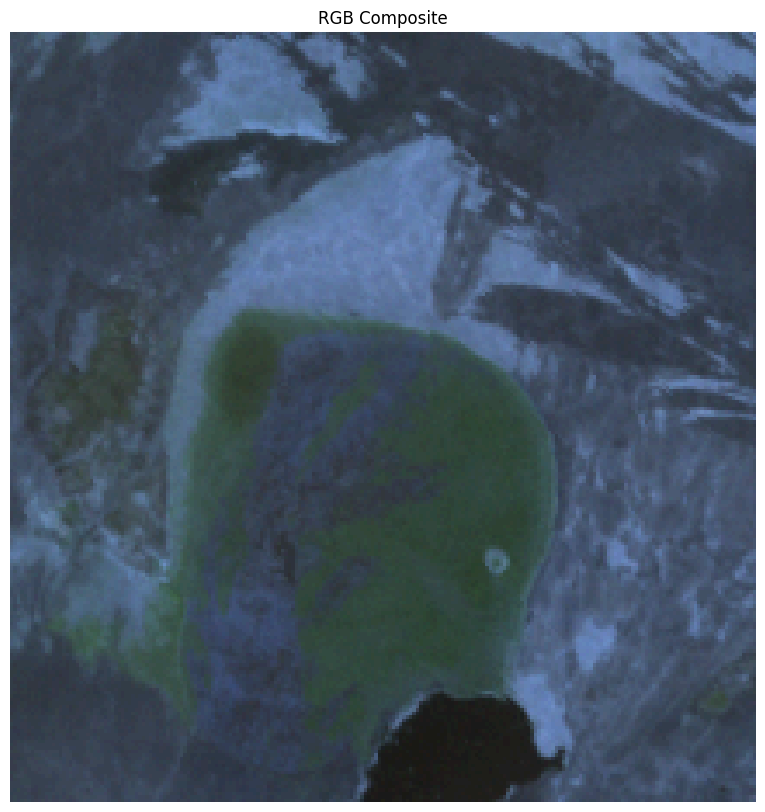

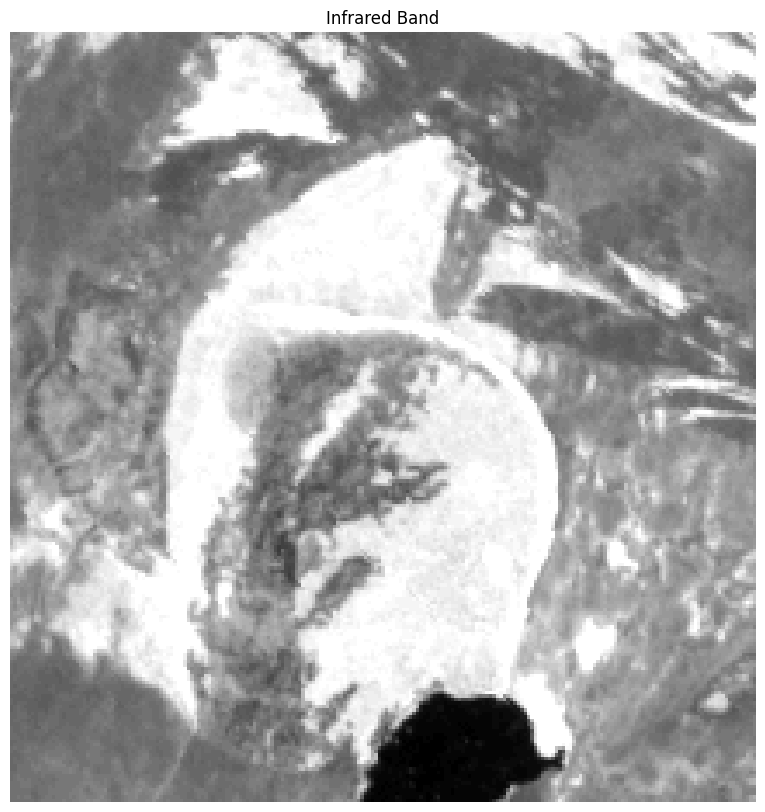

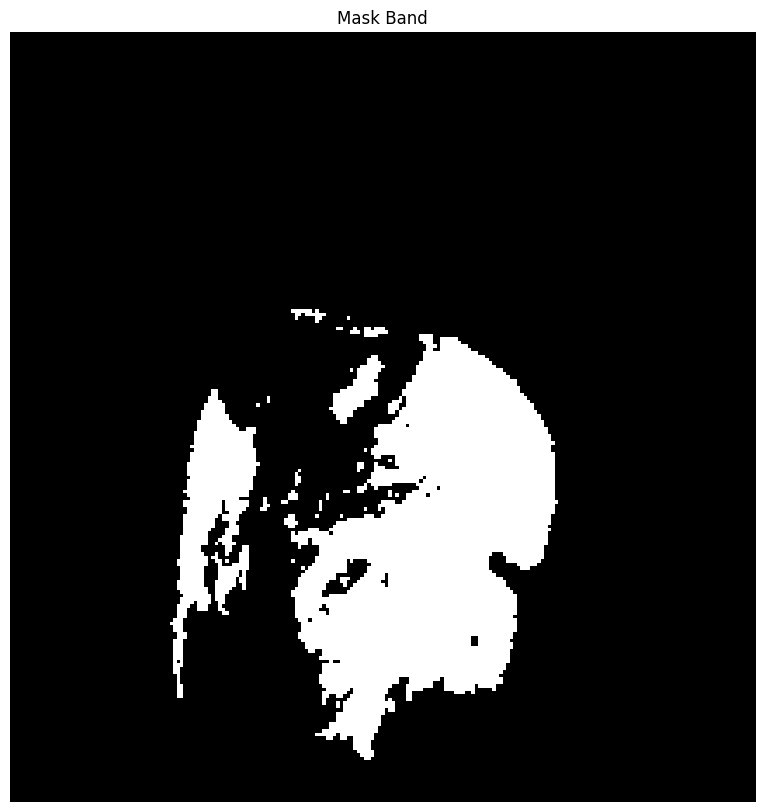

In [12]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np

file_path = '/kaggle/working/augmented_images/photo_13_flipped_horizontal.tiff'

def print_geotiff_info(path):
    try:
        # Открываем файл
        with rasterio.open(path) as src:
            # Основные метаданные
            print(f"File Path: {path}")
            print(f"Driver: {src.driver}")
            print(f"Width: {src.width}")
            print(f"Height: {src.height}")
            print(f"Count (Bands): {src.count}")
            print(f"CRS: {src.crs}")
            print(f"Transform: {src.transform}")
            print(f"Bounding Box: {src.bounds}")
            print(f"Datum: {src.dtypes}")

            # Информация по каждому каналу
            for i in range(1, src.count + 1):
                band = src.read(i)
                print(f"\nBand {i}:")
                print(f"  Data Type: {src.dtypes[i - 1]}")
                print(f"  Min Value: {band.min()}")
                print(f"  Max Value: {band.max()}")
                print(f"  Mean Value: {band.mean()}")
                print(f"  Standard Deviation: {band.std()}")

    except Exception as e:
        print(f'Error: {e}')


# Вывод информации о GeoTIFF
print_geotiff_info(file_path)

def visualize_rgb_geotiff(file_path, r_band, g_band, b_band, ik_band, mask_band):
    try:
        with rasterio.open(file_path) as src:
            # Проверка количества каналов
            if src.count < max(r_band, g_band, b_band, ik_band, mask_band):
                raise ValueError("Файл не содержит достаточного количества каналов")

            # Считывание нужных каналов
            red = src.read(r_band)
            green = src.read(g_band)
            blue = src.read(b_band)
            ik = src.read(ik_band)
            mask = src.read(mask_band)

            # Создание RGB-изображения
            rgb_image = np.dstack((red, green, blue))

            # Преобразование данных для корректной визуализации
            rgb_image = np.clip(rgb_image, 0, 255).astype(np.uint8)

            # Визуализация RGB-изображения
            plt.figure(figsize=(10, 10))
            plt.title("RGB Composite")
            plt.imshow(rgb_image)
            plt.axis('off')
            plt.show()

            # Визуализация инфракрасного изображения
            plt.figure(figsize=(10, 10))
            plt.title("Infrared Band")
            plt.imshow(ik, cmap='gray')
            plt.axis('off')
            plt.show()

            # Визуализация маски
            plt.figure(figsize=(10, 10))
            plt.title("Mask Band")
            plt.imshow(mask, cmap='gray')
            plt.axis('off')
            plt.show()

    except Exception as e:
        print(f'Ошибка: {e}')

# Визуализация изображения
visualize_rgb_geotiff(file_path, 1, 2, 3, 4, 5)

1. По какой логике построены .csv файлы?

2. Столбец порывы ветра с NaN (намек на то, что нужно найти metadata?)

3. Очень много пропусков в .csv файлах

4. Есть файлы, в которых вообще нет данных

5. Причины пожара: МН - что это такое?

6. Площадь пожара (лесная и покрытая лесной растительностью: в чем разница?)